In [15]:
import numpy as np
from scipy.integrate import odeint, ode
import matplotlib.pyplot as plt
import math

### Problema 6

In [ ]:
def f_c(t, z):
    x = z[0]
    y = z[1]
    dxdt = y + a*x
    dydt = -x + a*y - x**2*y
    return [dxdt, dydt]
## ---------------------- ** -------------------- ##
# Integración rk

a = -5 # CON UN VALOR COMO POSITIVO (5) SE FUE AL CARAJO VEEEEER.
dt = 0.001
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f_c).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f_c(0, zi)
        plt.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.9, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        plt.plot(xant, yant, color=c)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
## ---------------------- ** -------------------- ##

plt.title ("Integración rk G3P12")
plt.grid ()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))


### Problema 7

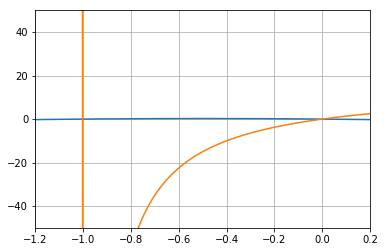

In [30]:
x = np.linspace (-10,10,1000)
y1 = lambda x:(b-x)*(1+x)
y2 = lambda x: x/(a*(1+x))
b = 0
a = 1/15
plt.plot (x,y1(x))
plt.plot (x,y2(x))
plt.xlim (-1.2,0.2)
plt.ylim (-50,50)
plt.grid ()
plt.show ()

In [ ]:
def f_c(t, z):
    x = z[0]
    y = z[1]
    dxdt = x*(b-x-y/(1+x))
    dydt = y*(x/(1+x)-a*y)
    return [dxdt, dydt]
## ---------------------- ** -------------------- ##
# Integración rk

a = 1/5
b = 2
dt = 0.001
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f_c).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
plt.figure()
for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f_c(0, zi)
        plt.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.9, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        plt.plot(xant, yant, color=c)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
## ---------------------- ** -------------------- ##

plt.title ("Integración rk G3P12")
plt.grid ()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))
C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))


### Problema 10

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


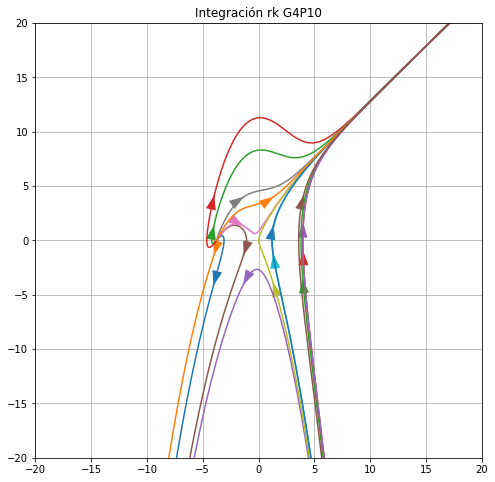

In [14]:
# Voy a ver como se modifica el flujo al modificar el parametro y ver si se produce la Bifurcación de Hopf.

def f_c(t, z):
    x = z[0]
    y = z[1]
    dxdt = y
    dydt = a+b*x+x**2-x*y
    return [dxdt, dydt]
## ---------------------- ** -------------------- ##
# Integración rk

a = 1
b = 4
dt = 0.01
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f_c).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
fig, ax = plt.subplots (figsize=(8, 8))

for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f_c(0, zi)
        ax.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.9, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        ax.plot(xant, yant, color=c)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)

## ---------------------- ** -------------------- ##

ax.set_title ("Integración rk G4P10")
plt.grid ()
plt.show ()

### Problema 5.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


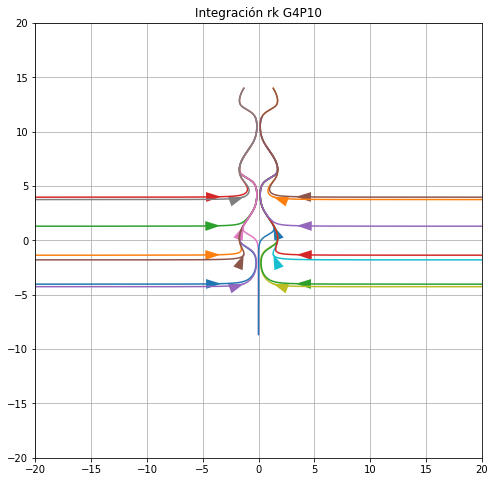

In [21]:
def f_c(t, z):
    x = z[0]
    y = z[1]
    dxdt = x *(1-x**2)+m*x*math.cos(y)
    dydt = 1
    return [dxdt, dydt]
## ---------------------- ** -------------------- ##
# Integración rk

m = 2
dt = 0.01
tmax = 10
t = np.arange(0, tmax, dt)
tpre = -10
# Este es un integrador. Integra la función "f" utilizando el método "dopri5". 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.ode.html
solver = ode(f_c).set_integrator('dopri5')
tant = np.arange(0, tpre, -dt)
Xi = np.linspace(-4, 4, 4)
Yi = np.linspace(-4, 4, 4)
fig, ax = plt.subplots (figsize=(8, 8))

for xi in Xi:
    for yi in Yi:
        zi = [xi, yi]
        solver.set_initial_value(zi, 0)
        # Armo 2 arrays + lleno de ceros al principio y después lleno de "nan".
        xt = np.zeros_like(t)
        xt.fill(np.nan)
        yt = np.zeros_like(t)
        yt.fill(np.nan)
        
        for ix, tt in enumerate(t):
            xt[ix], yt[ix] = solver.integrate(t[ix]) # Supongo que aca comienzo a integrar la función "f".
        line = plt.plot(xt, yt)
        c = line[0].get_color()
        dxi, dyi = f_c(0, zi)
        ax.arrow(xi, yi, dxi*dt, dyi*dt, shape='full', lw=0,
                  length_includes_head=True, head_width=.9, color=c)
        
        # Lo mismo que antes pero ahora integro hacia el pasado.
        solver.set_initial_value(zi, 0)
        xant = np.zeros_like(tant)
        xant.fill(np.nan)
        yant = np.zeros_like(tant)
        yant.fill(np.nan)
        for ix, tt in enumerate(tant):
            xant[ix], yant[ix] = solver.integrate(tant[ix])
        ax.plot(xant, yant, color=c)
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)

## ---------------------- ** -------------------- ##

ax.set_title ("Integración rk G4P5")
plt.grid ()
plt.show ()